In [1]:
! pip install sklearn

In [2]:
#輸入datasets
from sklearn import datasets
#pandas可以提供高效能、簡易使用的資料格式(DataFrame)，讓使用者可以快速操作及分析資料
import pandas as pd
#數學公式計算都靠它
import numpy as np
#畫圖都靠它
import matplotlib.pyplot as plt
#此套件可將資料自由切分成 訓練資料集 和 測試資料集
from sklearn.model_selection import train_test_split
#標準化資料集
from sklearn.preprocessing import minmax_scale
#KNN分類器演算法的套件
from sklearn import neighbors
#計算accuracy測量指標
from sklearn.metrics import accuracy_score
#計算precision,recall,f1-score,support測量指標
from sklearn.metrics import classification_report

### 二、使用安德森鳶尾花卉數據集(Iris dataset)來做數據分析-資料前處理-多類別
Iris 資料集的介紹：http://bit.ly/2ptEM0N （連結到wiki）

In [3]:
#輸入資料集
iris = datasets.load_iris()

In [4]:
#iris['data']是資料內容
#數據標準化(normalization)主要解決不同性質數據問題，讓每一個性質的資料可以在同一個起跑點作分析
#常見方法有:Max-Min scalar; z-score statistic scalar; maxabs scaler; robust scaler等
#此處我將使用Max-Min scalar做示範
x_iris = minmax_scale(iris['data'],feature_range=(0, 1), axis=0, copy=True)

In [5]:
#存取成dataFrame形式:  iris['feature_names']是資料標題
x_iris = pd.DataFrame(x_iris, columns=iris['feature_names'])
#只要看到".head()"都是pandas呈現資料用
x_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


In [6]:
#存取成dataFrame形式: iris['target']是類別
y_iris = pd.DataFrame(iris['target'], columns=['target'])
y_iris.head(3)

,target
0,0
1,0
2,0


In [7]:
#將資料與類別合併在一起
iris_data = pd.concat([x_iris,y_iris], axis=1)
#多類別分類
iris_data = iris_data[iris_data['target'].isin([0,1,2])]
iris_data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0


In [8]:
#將Iris資料隨機切分成 70%訓練資料集 和 30%測試資料集
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
    iris_data[['target']], test_size=0.3, random_state=0)

### 三、KNN演算法

### 測試K值

In [9]:
test_accuracy = []
for k in range(1, 20):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    KNN = clf.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_pred))
print('Finish')

Finish


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Text(0,0.5,'Testing Accuracy')

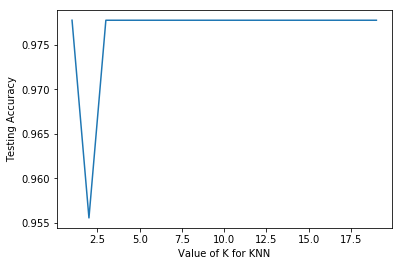

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1, 20), test_accuracy)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [11]:
test_accuracy == max(test_accuracy)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### 在這裡，我選擇K＝1即可

In [12]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
KNN = clf.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### 計算指標

In [13]:
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy = ' + str(accuracy))

Accuracy = 0.9777777777777777


In [14]:
print(classification_report(y_test, y_pred,digits=4))

             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        16
          1     1.0000    0.9444    0.9714        18
          2     0.9167    1.0000    0.9565        11

avg / total     0.9796    0.9778    0.9779        45

